 # Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
from collections import Counter
from sklearn.utils import shuffle

np.random.seed(42) # For reproducibility

# Defining Functions

In [2]:
def activation(z):
    # Softmax
    
    z_norm=np.exp(z - np.max(z, axis=0, keepdims=True))
    return np.divide(z_norm, np.sum(z_norm, axis=0, keepdims=True))

    # Sigmoid
    #return 1 / (1 + np.exp(-z))
    
    # Softplus
    #return np.log(1 + np.exp(z))

    # RELU
    #return np.maximum(z, 0, z)

def fit(x, y, max_iterations = 5000, alpha = 0.1, reg = 0):
    x = np.insert(x, 0, 1, axis = 1)
    
    classes = np.unique(y)
    
    w = np.zeros((x.shape[1], y.shape[1])) # Todas los pesos por clase (r, c)
    
    costs = np.zeros(max_iterations)
    
    m = len(y)
    
    for epoch in range(max_iterations):
        x, y = shuffle(x, y)
        y_hat = activation(w.T @ x.T).T
        
        w = w - (1/m)*alpha * (x.T @ (y_hat - y)) + reg * w
        costs[epoch] = -np.sum(np.sum(y * np.log(y_hat + 1e-6)))
    
    return w, classes, costs

def predict(classes, ws, x):
    x = np.insert(x, 0, 1, axis = 1)
    
    predictions = np.argmax(activation(ws.T @ x.T).T, axis = 1)
    
    return predictions

def score(classes, theta, x, y):
    return (predict(classes, theta, x) == np.array(list(map(lambda x : np.where(x == 1)[0][0], y)))).mean()

# Loading MNIST

In [3]:
main_path = 'C:/Users/jeff_/Dropbox/Jupyter Notebooks/MNIST/'
extension = '/*.png'
train = 'entrenamiento/'
test = 'prueba/'
Y_train = []
Y_test = []
images_array = []

num_classes = 10

for i in range(num_classes):
    filelist = glob(''.join([main_path, train, str(i), extension]))
    images_array += [np.array(Image.open(fname)).flatten() for fname in filelist[:]]
    for num in range(len(filelist)):
        Y_train.append(i)

X_train = np.array(images_array)

images_array.clear()

for i in range(num_classes):
    filelist = glob(''.join([main_path, test, str(i), extension]))
    images_array += [np.array(Image.open(fname)).flatten() for fname in filelist[:]]
    for num in range(len(filelist)):
        Y_test.append(i)

X_test = np.array(images_array)

#Y_train = np.array(Y_train)
#Y_test = np.array(Y_test)

In [4]:
print(f'Training set: {Counter(Y_train)}')
print(f'Test set: {Counter(Y_test)}')

Training set: Counter({2: 120, 7: 111, 6: 108, 3: 107, 9: 103, 1: 102, 0: 100, 5: 85, 4: 84, 8: 80})
Test set: Counter({4: 27, 3: 23, 2: 21, 6: 21, 9: 21, 8: 20, 1: 18, 5: 17, 0: 16, 7: 16})


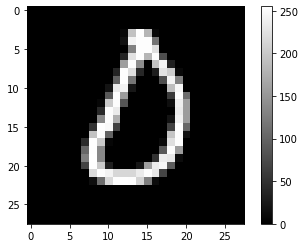

In [5]:
# Before normaliation
c = plt.imshow(X_test[0].reshape(28, 28), cmap = 'gray')
plt.colorbar(c)

In [6]:
# Normalizing and one hot encoding
X_train = X_train / 255
X_test = X_test / 255

Y_train = np.array(list(map(lambda x : np.eye(num_classes)[x], Y_train))) # One-hot encoding
Y_test = np.array(list(map(lambda x : np.eye(num_classes)[x], Y_test))) # One-hot encoding

Text(0.5, 1.0, 'One Hot Encoding = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]')

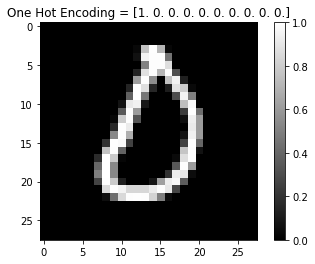

In [7]:
# After normalization
c = plt.imshow(X_test[0].reshape(28, 28), cmap = 'gray')
plt.colorbar(c)
plt.title(f'One Hot Encoding = {Y_test[0]}')

# Training

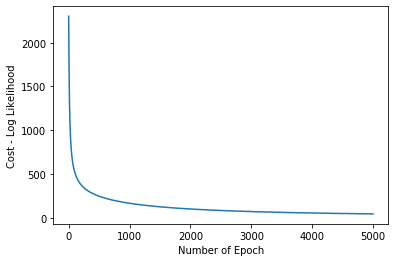

In [8]:
weights, classes, costs = fit(X_train[:, :], Y_train, max_iterations = 5000)
plt.plot(costs)
plt.xlabel('Number of Epoch'); plt.ylabel('Cost - Log Likelihood');

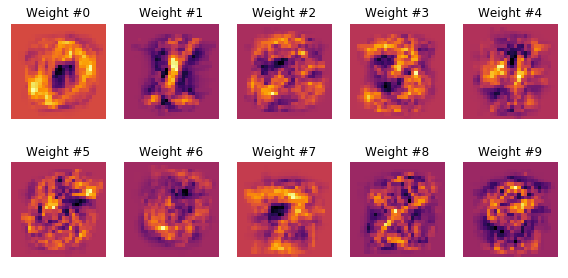

In [9]:
fig, axs = plt.subplots(2, 5, figsize=(8,4))
count = 0

for i in range(2):
    for j in range(5):
        ax = axs[i][j]
        
        #c = ax.pcolor(thetas[i + j][1:].reshape(28, 28), cmap = 'gray')
        ax.imshow(np.array(weights.T[count][1:]).reshape(28, 28), cmap = 'inferno', interpolation='nearest')
        ax.axis('off')
        ax.axis('equal')
        ax.set_title(f'Weight #{count}').set_position([0.5, 0.9])
        count += 1
        
fig.tight_layout()
plt.show()

# Predicting and Scoring the Accuracy of the Model

In [10]:
print(f"Train Accuracy: {score(classes, weights, X_train, Y_train):.3f}")
print(f"Test Accuracy: {score(classes, weights, X_test, Y_test):.3f}")

Train Accuracy: 1.000
Test Accuracy: 0.895


   # Finding the misclassified numbers

In [11]:
predictions = np.array(predict(classes, weights, X_test))

In [12]:
fails = np.argwhere(predict(classes, weights, X_test) != np.array(list(map(lambda x : np.where(x == 1)[0][0], Y_test))))

In [13]:
for f in fails:
    print(f'Missclasified a {np.where(Y_test[f][0] == 1)[0][0]}')

Missclasified a 1
Missclasified a 2
Missclasified a 3
Missclasified a 3
Missclasified a 3
Missclasified a 3
Missclasified a 4
Missclasified a 4
Missclasified a 4
Missclasified a 4
Missclasified a 5
Missclasified a 5
Missclasified a 6
Missclasified a 7
Missclasified a 8
Missclasified a 8
Missclasified a 8
Missclasified a 8
Missclasified a 9
Missclasified a 9
Missclasified a 9
